<a href="https://colab.research.google.com/github/Ryan-spec/Portfolio-Projects/blob/master/Portfolio_Optimization_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # Finance Portfolio Optimization With Python

---





In [1]:
# This program attempts to optimize a users portfolio using the Efficient Frontier 

In [2]:
# Import the libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 


In [3]:
# Get the stock tickers or symbols in the portfolio
#FAANG - USA most valuable Tech Companies
assets = ['FB','AMZN','AAPL','NFLX','GOOG']

In [4]:
# Assign weights to the stocks
weights = np.array([0.2,0.2,0.2,0.2,0.2])

In [5]:
# Get the stock start date
stockStartDate = '2013-01-01'

In [6]:
# Get the stock end date
today = datetime.today().strftime('%Y-%m-%d')
today

'2020-07-03'

In [7]:
# Create a DataFrame to store the Adj Close Price of the stocks
df = pd.DataFrame()

# Store the Adj Close Price into the datafame
for stock in assets:
  df[stock] = web.DataReader(stock, data_source='yahoo', start=stockStartDate, end = today)['Adj Close']

In [8]:
# Show df
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,68.502106,13.144286,360.274597
2013-01-03,27.770000,258.480011,67.637436,13.798572,360.483826
2013-01-04,28.760000,259.149994,65.753418,13.711429,367.607117
2013-01-07,29.420000,268.459991,65.366646,14.171429,366.003143
2013-01-08,29.059999,266.380005,65.542587,13.880000,365.280823
...,...,...,...,...,...
2020-06-26,216.080002,2692.870117,353.630005,443.399994,1359.900024
2020-06-29,220.639999,2680.379883,361.779999,447.239990,1394.969971
2020-06-30,227.070007,2758.820068,364.799988,455.040009,1413.609985


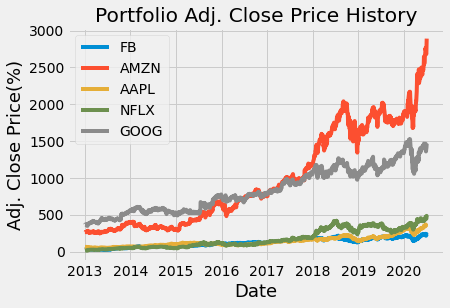

In [9]:
# Visualize the stock portfolio 

title = 'Portfolio Adj. Close Price History'

# Get the stocks
my_stocks = df

# Create and plot the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj. Close Price(%)', fontsize=18)
plt.legend(my_stocks.columns.values)
plt.show()

In [10]:
# Show the daily simple return
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012623,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002692,-0.020565,-0.001974
...,...,...,...,...,...
2020-06-26,-0.083164,-0.022403,-0.030726,-0.048314,-0.056496
2020-06-29,0.021103,-0.004638,0.023047,0.008660,0.025789
2020-06-30,0.029143,0.029265,0.008348,0.017440,0.013362


In [11]:
# Create and show the annualized covariance matrix
cov_annual_matrix = returns.cov() * 252
cov_annual_matrix

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.116965,0.052247,0.041163,0.054714,0.049190
AMZN,0.052247,0.091515,0.035707,0.061267,0.046524
AAPL,0.041163,0.035707,0.076530,0.032012,0.037582
NFLX,0.054714,0.061267,0.032012,0.212310,0.048884
GOOG,0.049190,0.046524,0.037582,0.048884,0.065068


In [12]:
# Calculate the portfolio variance 
port_variance = np.dot(weights.T, np.dot(cov_annual_matrix, weights))
port_variance

0.05923868885561533

In [13]:
# Calculate the portfolio volatility / standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.2433899933350082

In [14]:
# Calculate the annual portfolio return 
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.35452595312732793

In [15]:
# Show the expected annual return, volatility(risk), and variance
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vol = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'

print('Expected annual return: ' + percent_ret)
print('Annual volatility(risk): ' + percent_vol)
print('Annual variance: ' + percent_var)

Expected annual return: 35.0%
Annual volatility(risk): 24.0%
Annual variance: 6.0%


In [16]:
pip install PyPortfolioOpt

     |████████████████████████████████| 51kB 1.5MB/s 


In [17]:
# Import the libraries
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [18]:
# Portfolio Optimization

# Calculate the expected returns and the annualised sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for max sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights() 
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('FB', 0.12948), ('AMZN', 0.31937), ('AAPL', 0.22417), ('NFLX', 0.32697), ('GOOG', 0.0)])
Expected annual return: 41.1%
Annual volatility: 26.8%
Sharpe Ratio: 1.46


(0.4108084837579751, 0.2679264424007808, 1.4586409622585135)

In [21]:
# Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: ${:.2f}'.format(leftover)) 


Discrete allocation: {'FB': 5.0, 'AMZN': 2.0, 'AAPL': 9.0, 'NFLX': 10.0}
Funds remaining: $6.41


As the results show, in order to optimize this portfolio using $15 000, we'd have to buy 5 shares of Facebook, 2 shares of Amazon, 9 shares of Apple and 10 shares of Netflix. 